In [1]:
!pip install tensorflow==2.12.0
!pip install tensorflow-addons==0.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting un

In [2]:
import zipfile

In [3]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Try 3

In [4]:
import tensorflow_addons as tfa

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [5]:
!pip install gdown

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [6]:
# !gdown "https://drive.google.com/uc?id=1QAkYNXInCNX35b2lI8dXHFvVjor9AIVk"


In [7]:
# zip_path = "/kaggle/working/Copy of Copy of train.zip"  # Path to the ZIP file
# extracted_path = "/kaggle/working/chest_ctscan_images"  # Path to extract the files
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

In [8]:
def split_dataset(source_dir, output_dir, train_ratio=0.7, valid_ratio=0.2):
    """
    Splits data into train, validation, and test sets.
    
    Parameters:
    - source_dir: Path to the source dataset directory.
    - output_dir: Path to the output directory for train, valid, and test sets.
    - train_ratio: Proportion of data to allocate to training.
    - valid_ratio: Proportion of data to allocate to validation.
    
    Remaining proportion will be allocated to the test set.
    """
    if not os.path.exists(source_dir):
        raise FileNotFoundError(f"Source directory not found: {source_dir}")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Create train, valid, and test directories
    train_dir = os.path.join(output_dir, 'train')
    valid_dir = os.path.join(output_dir, 'valid')
    test_dir = os.path.join(output_dir, 'test')

    for dir_path in [train_dir, valid_dir, test_dir]:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

    # Iterate over classes
    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_source_path):
            continue
        
        files = os.listdir(class_source_path)
        train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
        valid_files, test_files = train_test_split(temp_files, test_size=(1 - valid_ratio / (1 - train_ratio)), random_state=42)

        # Create class subdirectories in train, valid, and test
        for split_dir, split_files in zip([train_dir, valid_dir, test_dir], [train_files, valid_files, test_files]):
            class_split_path = os.path.join(split_dir, class_name)
            if not os.path.exists(class_split_path):
                os.makedirs(class_split_path)

            # Copy files to respective directories
            for file in split_files:
                shutil.copy2(os.path.join(class_source_path, file), os.path.join(class_split_path, file))

    print("Dataset successfully split into train, valid, and test sets.")

# Example usage
source_dir = '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
output_dir = '/kaggle/working/split_dataset'

split_dataset(source_dir, output_dir, train_ratio=0.7, valid_ratio=0.2)


Dataset successfully split into train, valid, and test sets.


In [9]:
# train_dir = os.path.join(extracted_path, "train")
# valid_dir = "/kaggle/working/chest_ctscan_images/valid"
# test_dir = "/kaggle/working/chest_ctscan_images/test"

In [10]:
# # Create a validation set from a portion of the training set
# def create_validation_set(source_dir, validation_dir, validation_ratio=0.2):
#     if not os.path.exists(validation_dir):
#         os.makedirs(validation_dir)

#     for class_name in os.listdir(source_dir):
#         class_source_path = os.path.join(source_dir, class_name)
#         class_valid_path = os.path.join(validation_dir, class_name)

#         if not os.path.exists(class_valid_path):
#             os.makedirs(class_valid_path)

#         all_files = os.listdir(class_source_path)
#         train_files, valid_files = train_test_split(all_files, test_size=validation_ratio, random_state=42)

#         for file in valid_files:
#             shutil.move(os.path.join(class_source_path, file), os.path.join(class_valid_path, file))

# create_validation_set(train_dir, valid_dir, validation_ratio=0.2)  # Split 20% for validation

In [11]:
# # Example code to create a test set from a portion of the training set
# def create_test_set(source_dir, test_dir, test_ratio=0.1):
#     # Create test directory if it doesn't exist
#     if not os.path.exists(test_dir):
#         os.makedirs(test_dir)

#     for class_name in os.listdir(source_dir):
#         class_source_path = os.path.join(source_dir, class_name)
#         class_test_path = os.path.join(test_dir, class_name)

#         if not os.path.exists(class_test_path):
#             os.makedirs(class_test_path)

#         all_files = os.listdir(class_source_path)
#         train_files, test_files = train_test_split(all_files, test_size=test_ratio, random_state=42)

#         for file in test_files:
#             shutil.move(os.path.join(class_source_path, file), os.path.join(class_test_path, file))

# create_test_set(train_dir, test_dir, test_ratio=0.18)  # Split 10% for test

In [12]:
train_datagen = ImageDataGenerator(
    # rescale=1.0/255,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

In [13]:
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [14]:
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/split_dataset/train",
    target_size=(224,224),
    batch_size=6,
    class_mode='categorical'
)

Found 766 images belonging to 3 classes.


In [15]:
validation_generator = valid_datagen.flow_from_directory(
    "/kaggle/working/split_dataset/valid",
    target_size=(224,224),
    batch_size=6,
    class_mode='categorical'
)

Found 219 images belonging to 3 classes.


In [16]:
test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/split_dataset/test",
    target_size=(224,224),
    batch_size=6,
    class_mode='categorical'
)

Found 112 images belonging to 3 classes.


In [17]:
# os.makedirs(test_dir, exist_ok=True)

In [18]:
# # Example to list files in the test directory
# test_files = os.listdir(test_dir)
# print("Number of files in test directory:", len(test_files))

In [19]:
# print("Test directory:", test_dir)

In [20]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

In [21]:
METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=4, average="micro", name='f1_score')
]

In [22]:
base_model = tf.keras.applications.ConvNeXtTiny(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

111650432/111650432 [==============================] - 1s 0us/step


In [23]:
total_layers = len(base_model.layers)

In [24]:
num_layers_to_freeze = 0

In [25]:
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = True

In [26]:
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

Layer 0: input_1, Trainable: True
Layer 1: convnext_tiny_prestem_normalization, Trainable: True
Layer 2: convnext_tiny_stem, Trainable: True
Layer 3: convnext_tiny_stage_0_block_0_depthwise_conv, Trainable: True
Layer 4: convnext_tiny_stage_0_block_0_layernorm, Trainable: True
Layer 5: convnext_tiny_stage_0_block_0_pointwise_conv_1, Trainable: True
Layer 6: convnext_tiny_stage_0_block_0_gelu, Trainable: True
Layer 7: convnext_tiny_stage_0_block_0_pointwise_conv_2, Trainable: True
Layer 8: convnext_tiny_stage_0_block_0_layer_scale, Trainable: True
Layer 9: convnext_tiny_stage_0_block_0_identity, Trainable: True
Layer 10: tf.__operators__.add, Trainable: True
Layer 11: convnext_tiny_stage_0_block_1_depthwise_conv, Trainable: True
Layer 12: convnext_tiny_stage_0_block_1_layernorm, Trainable: True
Layer 13: convnext_tiny_stage_0_block_1_pointwise_conv_1, Trainable: True
Layer 14: convnext_tiny_stage_0_block_1_gelu, Trainable: True
Layer 15: convnext_tiny_stage_0_block_1_pointwise_conv_2, T

In [27]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_tiny (Functional)  (None, 7, 7, 768)         27820128  
                                                                 
 global_average_pooling2d (G  (None, 768)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 2307      
                                                                 
Total params: 27,822,435
Trainable params: 27,822,435
Non-trainable params: 0
_________________________________________________________________


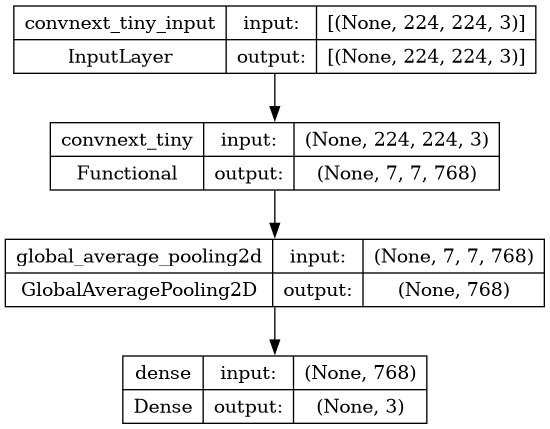

In [28]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [29]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=METRICS
)

In [30]:
callbacks = [
    ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1),
     EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)
]

In [31]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=35,
    callbacks=callbacks,
        verbose=1
    #  , class_weight=class_weights
)

Epoch 1/35
128/128 [==============================] - ETA: 0s - loss: 0.4568 - accuracy: 0.8264 - precision: 0.8395 - recall: 0.7990 - auc: 0.9453 - f1_score: 0.8264 
Epoch 1: val_accuracy improved from -inf to 0.90411, saving model to best_model.keras
128/128 [==============================] - 2607s 20s/step - loss: 0.4568 - accuracy: 0.8264 - precision: 0.8395 - recall: 0.7990 - auc: 0.9453 - f1_score: 0.8264 - val_loss: 0.1816 - val_accuracy: 0.9041 - val_precision: 0.9041 - val_recall: 0.9041 - val_auc: 0.9916 - val_f1_score: 0.9041
Epoch 2/35
128/128 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9178 - precision: 0.9221 - recall: 0.9112 - auc: 0.9879 - f1_score: 0.9178 
Epoch 2: val_accuracy improved from 0.90411 to 0.92694, saving model to best_model.keras
128/128 [==============================] - 2602s 20s/step - loss: 0.2036 - accuracy: 0.9178 - precision: 0.9221 - recall: 0.9112 - auc: 0.9879 - f1_score: 0.9178 - val_loss: 0.1824 - val_accuracy: 0.92

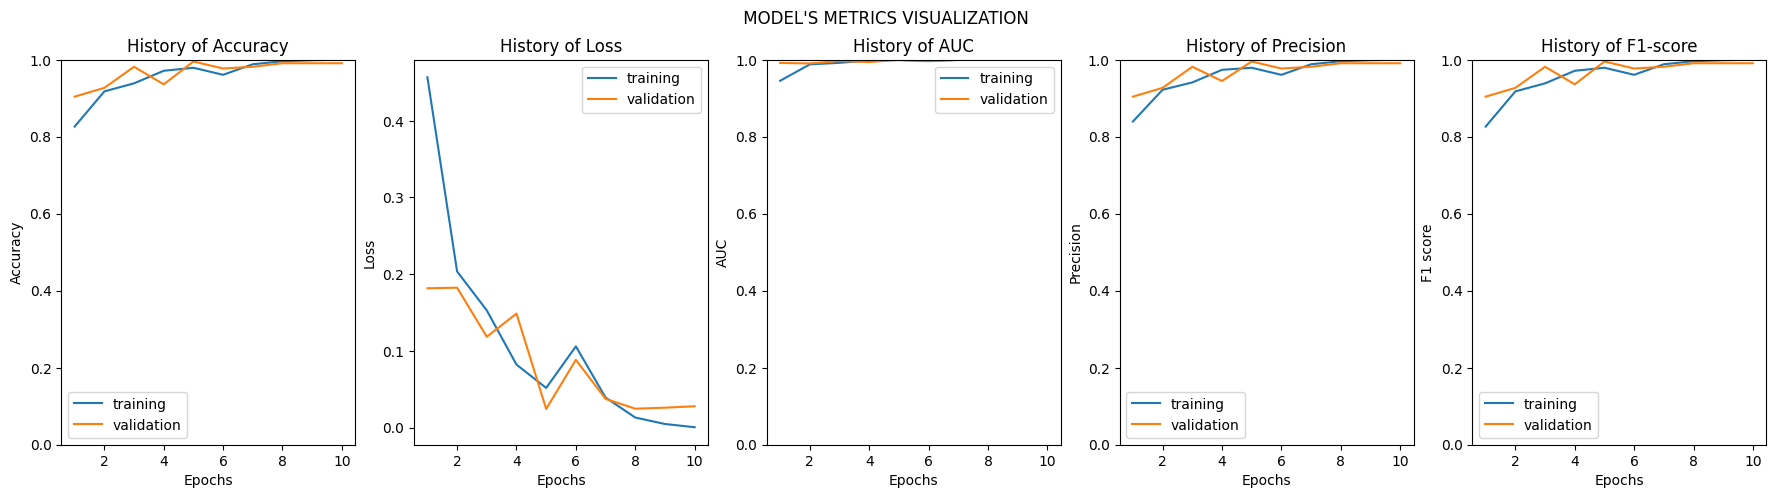

In [32]:
def Train_Val_Plot(acc, val_acc, loss, val_loss, auc, val_auc, precision, val_precision, f1, val_f1):

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(22, 5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    # Rescale the y-axis for accuracy, auc, precision, and f1
    rescale_factor = 0  # Adjust this factor to control the rescaling

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim([0, 1.0])
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.set_ylim([rescale_factor, 1.0])
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.set_ylim([rescale_factor, 1.0])
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.set_ylim([rescale_factor, 1.0])
    ax5.legend(['training', 'validation'])

    plt.show()

# Example usage:
Train_Val_Plot(history.history['accuracy'], history.history['val_accuracy'],
               history.history['loss'], history.history['val_loss']
               ,
               history.history['auc'], history.history['val_auc'],
               history.history['precision'], history.history['val_precision'],
               history.history['f1_score'], history.history['val_f1_score'])

In [33]:
model.evaluate(test_generator)

19/19 [==============================] - 117s 6s/step - loss: 0.0066 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - f1_score: 1.0000


[0.006649371236562729, 1.0, 1.0, 1.0, 1.0, 1.0]

In [34]:
# Load the test dataset
X_test, y_test = [], []
for i in range(len(validation_generator)):
    batch_X, batch_y = validation_generator[i]
    X_test.append(batch_X)
    y_test.append(batch_y)
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Create a classification report
report = classification_report(y_true_classes, y_pred_classes)

print(report)

7/7 [==============================] - 189s 27s/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00       112
           2       0.99      1.00      0.99        83

    accuracy                           1.00       219
   macro avg       1.00      0.99      0.99       219
weighted avg       1.00      1.00      1.00       219



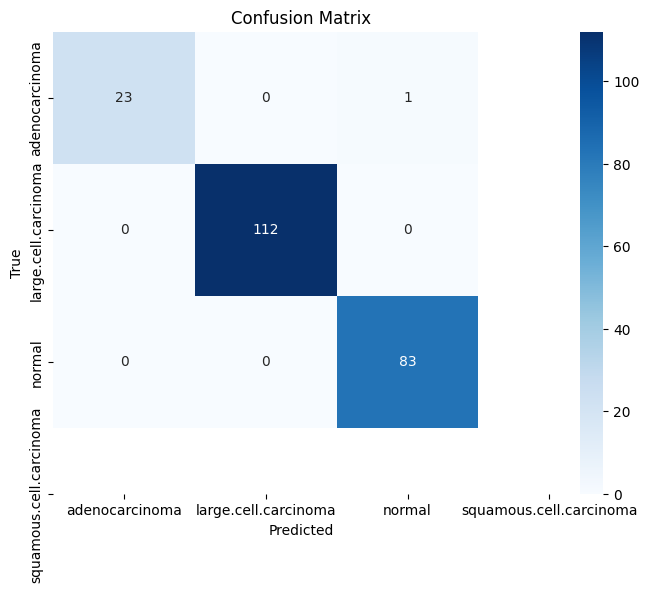

In [35]:
class_names = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()